# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
! pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 63.5 MB/s eta 0:00:00m eta 0:00:0136m0:00:01m
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [4]:
! pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-9.2.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.2 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [6]:
! pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 64.2 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [9]:
! pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached scipy-1.8.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 7.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [13]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.6 MB/s eta 0:00:000:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [15]:
! pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [16]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  # random forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
# Step 1. Load the dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv'
df = pd.read_csv(url, index_col=0)


In [18]:
# ver los datos 
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# 1.1 Get basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
# descripción del dataset:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# 1.2 Take a sample
df.sample(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.00,0,0,347078,7.7500,NaN,S
292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.00,1,0,11967,91.0792,B49,C
845,0,3,"Culumovic, Mr. Jeso",male,17.00,0,0,315090,8.6625,NaN,S
429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.00,1,1,363291,20.5250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.00,0,0,STON/O 2. 3101275,7.1250,NaN,S
179,0,2,"Hale, Mr. Reginald",male,30.00,0,0,250653,13.0000,NaN,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [22]:
# solo estamos viendo las variables objetos:
df.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Eliminamos la cabina e imputamos en los faltantes en la edad con la media**.

In [23]:
# elimino la columna Cabin
df=df.drop(columns='Cabin')

In [24]:
# imputamos en los faltantes de la edad con la meida y la moda en embarked:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


<AxesSubplot:>

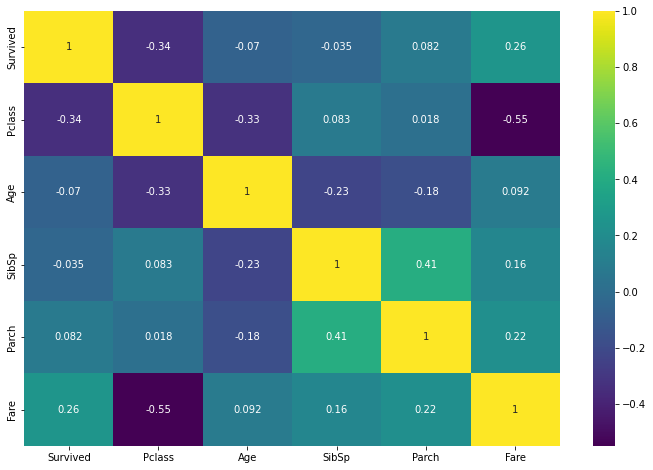

In [26]:
# correlaciones entre numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [27]:
# 1.3 Transform if needed
# esa transformación afecta a todo el dataset (antes de dividirlo)
X=df.drop(columns=['Ticket','Name','Survived'])
y=df['Survived']

In [28]:
X[['Sex','Embarked']]=X[['Sex','Embarked']].astype('category')

In [29]:
X['Sex']=X['Sex'].cat.codes

In [30]:
X['Embarked']=X['Embarked'].cat.codes

In [31]:
# veo la información del dataset luego de hacer los cambios:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 43.5 KB


In [32]:
# veo como me queda el datastes X
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [33]:
# 2.1 Split the dataset so to avoid bias
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1107)

In [34]:
# balance de variable dependiente
y.value_counts(normalize=True)


0    0.616162
1    0.383838
Name: Survived, dtype: float64

*No se considera desbalanceada la variable target*

In [36]:
# se convierte a categórica
X[['Sex','Embarked']]=X[['Sex','Embarked']].astype('category')

**Estimación modelo Random Forest**

**Primero se estima modelo con parámetros por defecto (sin tunear)**

In [38]:
classif=RandomForestClassifier(random_state=1107)

In [39]:
classif.fit(X_train,y_train)

RandomForestClassifier(random_state=1107)

In [40]:
#show predicted dataset:

y_pred=classif.predict(X_test)

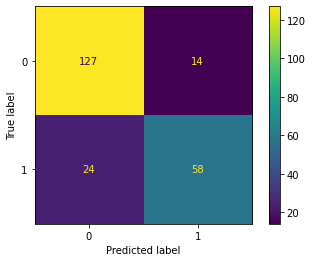

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=classif.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classif.classes_)
disp.plot()

plt.show()


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       141
           1       0.81      0.71      0.75        82

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



El modelo inicial tiene una precisión aceptable. A continuación se busca qué combinación de hiperparámetros produce el mejor resultado (mayor precisión.)

Estos son los parámetros por defecto:
* n_estimators=100
* criterion=gini
* max_depthint=None
* min_samples_splitint=2
* min_samples_leafint=1
* min_weight_fraction_leaffloat=0.0
* max_features='sqrt'
* max_leaf_nodesint=None
* min_impurity_decreasefloat=0.0
* bootstrapbool=True
* oob_scorebool=False
* n_jobsint=None
* random_stateint=None
* verboseint=0
* warm_startbool=False
* class_weight=None
* ccp_alphanon=0.0
* max_samplesint=None


**Busqueda con hiperparametros**

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterio
criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [45]:
classif_grid=RandomForestClassifier(random_state=1107)
classif_grid_random=RandomizedSearchCV(estimator=classif_grid,n_iter=100,cv=5,random_state=1107,param_distributions=random_grid)

In [46]:
classif_grid_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1107)

In [47]:
classif_grid_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': True}

**Mejor bosque**

In [48]:
best_param = classif_grid_random.best_params_


In [49]:
best_param

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': True}

In [52]:
# usando la mejor combinación de hiperparámetros, estimo modelo final
best_RF=RandomForestClassifier(**best_param)

In [53]:
best_RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=90, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=400)

**usando la mejor combinación de hiperparámetros, estimo modelo final**
**best_RF=RandomForestClassifier(random_state=1107, n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_depth=90, criterion='entropy', bootstrap=True)
#best_RF.fit(X_train,y_train)**

In [54]:
y_pred_best=best_RF.predict(X_test)

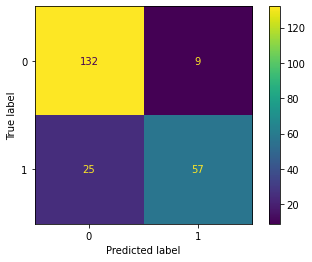

In [55]:
cm = confusion_matrix(y_test, y_pred_best, labels=best_RF.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=classif.classes_)
disp.plot()

plt.show()

**Guardo mejor modelo estimado**

In [56]:
filename = '../models/final_model.sav'
pickle.dump(best_RF, open(filename, 'wb'))
